In [124]:
# !pip install seaborn -q --upgrade

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(f"Seaborn Version: {sns.__version__}")

Seaborn Version: 0.13.2


In [3]:
X, _ = datasets.load_diabetes(return_X_y=True)

In [4]:
columns = datasets.load_diabetes()['feature_names']

In [5]:
df = pd.DataFrame(X,columns=columns)

In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
df.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [8]:
corr = np.round(df.corr() * 100, 3) # in percentage round off to 3 decimal places

In [9]:
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,100.000,17.374,18.508,33.543,26.006,21.924,-7.518,20.384,27.077,30.173
sex,17.374,100.000,8.816,24.101,3.528,14.264,-37.909,33.212,14.992,20.813
bmi,18.508,8.816,100.000,39.541,24.978,26.117,-36.681,41.381,44.616,38.868
bp,33.543,24.101,39.541,100.000,24.246,18.555,-17.876,25.765,39.348,39.043
s1,26.006,3.528,24.978,24.246,100.000,89.666,5.152,54.221,51.550,32.572
s2,21.924,14.264,26.117,18.555,89.666,100.000,-19.646,65.982,31.836,29.060
s3,-7.518,-37.909,-36.681,-17.876,5.152,-19.646,100.000,-73.849,-39.858,-27.370
s4,20.384,33.212,41.381,25.765,54.221,65.982,-73.849,100.000,61.786,41.721
s5,27.077,14.992,44.616,39.348,51.550,31.836,-39.858,61.786,100.000,46.467
s6,30.173,20.813,38.868,39.043,32.572,29.060,-27.370,41.721,46.467,100.000


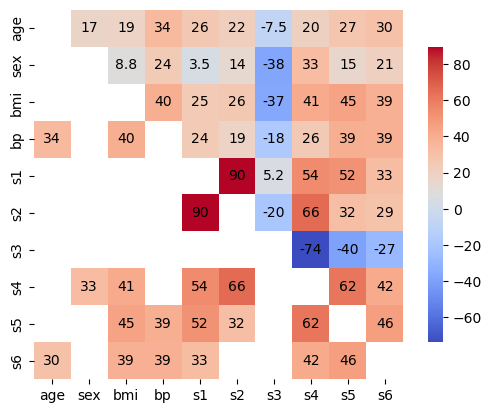

In [40]:
# Create a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))
mask = np.tril(np.ones_like(corr, dtype=bool))

thresh = 30.0
n = mask.shape[0]
# Traverse the lower triangle
for i in range(n):
    for j in range(i + 1):  # j goes from 0 to i (inclusive)
        val = corr.iloc[i, j]
        if val > thresh and val < 100:
            mask[i][j] = False

# plotting the corraltion
sns.heatmap(corr, # correlation
            annot=True, # values of squares
            square=True, # square in plot
            cmap='coolwarm', # color system
            cbar_kws={"shrink": .8},
            mask=mask, # hididng upper tiangular 
            annot_kws={"size": 10, "color": "black"},  # Customize font size and color
            )
plt.show()

In [34]:
print(mask)

[[ True False False False False False False False False False]
 [ True  True False False False False False False False False]
 [ True  True  True False False False False False False False]
 [ True  True  True  True False False False False False False]
 [ True  True  True  True  True False False False False False]
 [ True  True  True  True  True  True False False False False]
 [ True  True  True  True  True  True  True False False False]
 [ True  True  True  True  True  True  True  True False False]
 [ True  True  True  True  True  True  True  True  True False]
 [ True  True  True  True  True  True  True  True  True  True]]


**Improvement:** on lower triangle show features which are highly correlated or has correlation greater than mentioned threshold

- by making chages in logic of `mask`

In [35]:
type(mask), mask.shape

(numpy.ndarray, (10, 10))

**Correlation Framework**

In [43]:
def create_lower_triangular_mask(corr: pd.DataFrame, thresh:float = 40):
    # mask = np.triu(np.ones_like(corr, dtype=bool))
    mask = np.tril(np.ones_like(corr, dtype=bool))
    # shape of mask
    n = mask.shape[0]
    # Traverse the lower triangle
    for i in range(n):
        for j in range(i + 1):  # j goes from 0 to i (inclusive)
            val = corr.iloc[i, j]
            if val > thresh and val < 100:
                mask[i][j] = False
    return mask

def check_correlation(df: pd.DataFrame, features: List[str], methods: List[str] = None, percent: bool = True) -> dict():
    # factor
    factor = 1
    if percent:
        factor = 100

    if methods is None:
        methods = ["pearson", "kendall", "spearman"]

    # calculating correlation
    corr = {}
    for method in methods:
        # round offing the correlation to 3 decimal places
        df_corr = np.round(df[features].corr(method=method) * factor, 3) # this counts fractional error
        corr[method] = df_corr

    return corr

def plot_correlation(corr_dict: dict(), width:int=15, height:int=4, thresh:float = 40) -> None:
    # collect no of methods
    no_of_methods = list(corr_dict.keys())
    # collect total columns
    list_of_columns = list(corr_dict[no_of_methods[0]].columns)

    # decide we have to plot horizontally or vertically
    if len(list_of_columns) > 5: 
        # go vertical 
        fig, axes = plt.subplots(len(no_of_methods), 1, figsize=(height, width))

        # plotting all the methods
        for row_idx, method_name in enumerate(no_of_methods):
            # generate mask based on threshold
            mask = create_lower_triangular_mask(corr_dict[method_name], thresh)
            sns.heatmap(corr_dict[method_name], annot=True,
                        square=True, # square in plot
                        cmap='coolwarm', # color system
                        cbar_kws={"shrink": .8},
                        mask=mask, # hididng upper tiangular 
                        annot_kws={"size": 10, "color": "black"},  # Customize font size and color
                        ax=axes[row_idx])

            axes[row_idx].set_title(f"{method_name} Correlation (%) | Min threshold: {thresh}")

        plt.tight_layout()
        plt.show()        

    else: 
        # go horizontal
        fig, axes = plt.subplots(1, len(no_of_methods), figsize=(width, height))

        # plotting all the methods
        for col_idx, method_name in enumerate(no_of_methods):
            # generate mask based on threshold
            mask = create_lower_triangular_mask(corr_dict[method_name], thresh)
            sns.heatmap(corr_dict[method_name], annot=True, 
                        square=True, # square in plot
                        cmap='coolwarm', # color system
                        cbar_kws={"shrink": .8},
                        mask=mask, # hididng upper tiangular 
                        annot_kws={"size": 10, "color": "black"},  # Customize font size and color
                        ax=axes[col_idx])
            axes[col_idx].set_title(f"{method_name} Correlation (%)| Min threshold: {thresh}")

        plt.tight_layout()
        plt.show()        
        

**Getting Correlations**

In [44]:
h = check_correlation(df, columns[:3])

**Plotting Correlations**

**Columns less than 5**

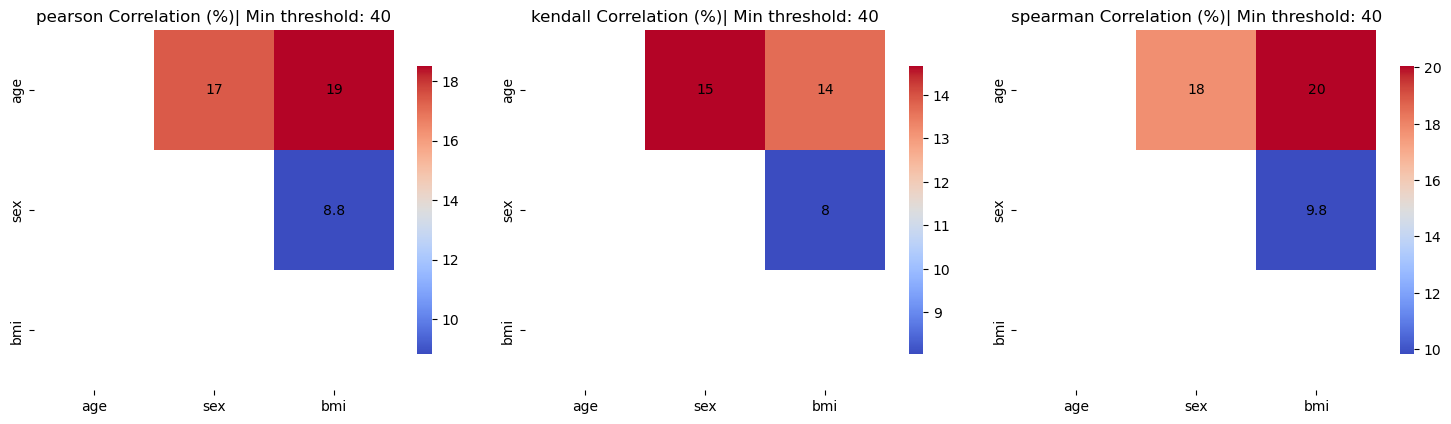

In [45]:
# horizontal plot
plot_correlation(h)

In [46]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

**If columns increases**

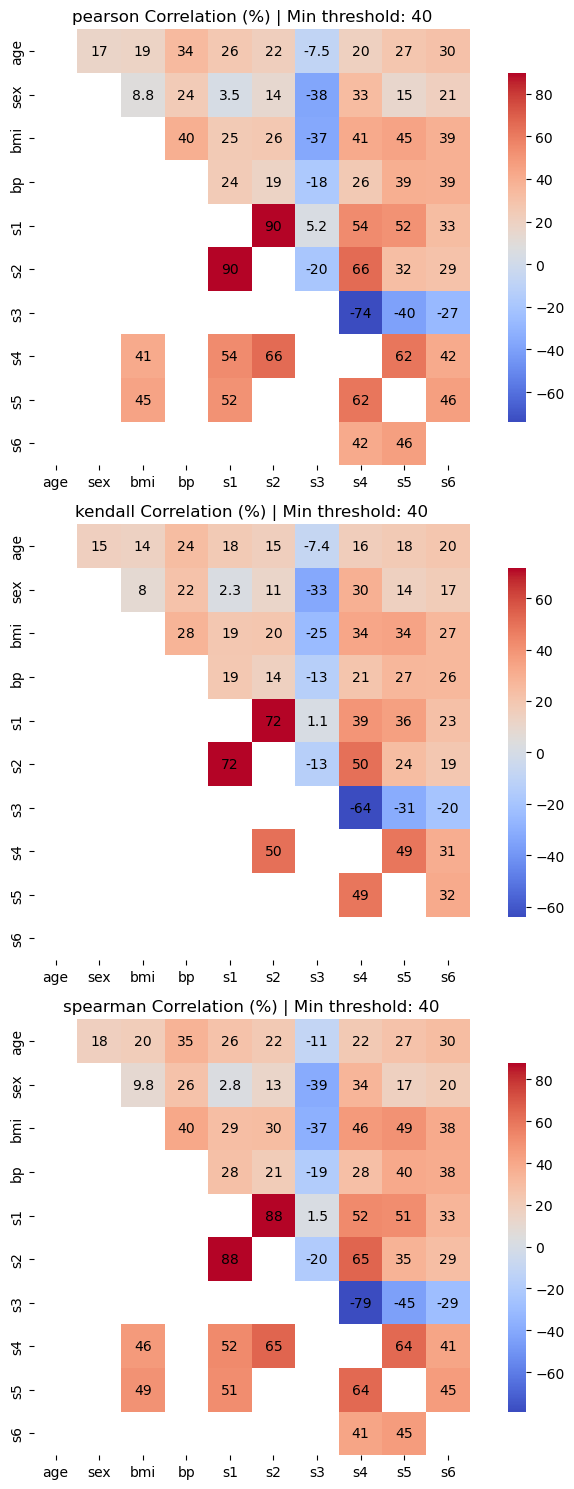

In [47]:
v = check_correlation(df, columns)
# vertical plot
plot_correlation(v, 15, 8)

**Feature Selection Based on Correlation**